# Airports Dataset Processing

In [1]:
from IPython.display import display_markdown

display_markdown(open("README.md").read(), raw=True)

# Airports data

This dataset contains locations of airports around the world.

- `Source`: Natural Earth
- `URL`

> [https://www.naturalearthdata.com/downloads/10m-cultural-vectors/airports/](https://www.naturalearthdata.com/downloads/10m-cultural-vectors/airports/)

- `Processing`: transformations documented in `airports_cleaning.ipynb`
    - Clean file: `airports_clean.geojson`


In [1]:
%matplotlib inline

import requests
import geopandas
import matplotlib.pyplot as plt

In [2]:
source_url = ("https://www.naturalearthdata.com/"\
              "http//www.naturalearthdata.com/"\
              "download/10m/cultural/ne_10m_airports.zip"
             )
source_url

'https://www.naturalearthdata.com/http//www.naturalearthdata.com/download/10m/cultural/ne_10m_airports.zip'

In [3]:
air = geopandas.read_file(source_url)
air.head()

,scalerank,featurecla,type,name,abbrev,location,gps_code,iata_code,wikipedia,natlscale,...,name_pl,name_pt,name_ru,name_sv,name_tr,name_vi,name_zh,wdid_score,ne_id,geometry
0,9,Airport,small,Sahnewal,LUH,terminal,VILD,LUH,http://en.wikipedia.org/wiki/Sahnewal_Airport,8.0,...,None,None,None,Ludhiana Airport,None,None,None,4,1159113785,POINT (75.95707 30.85036)
1,9,Airport,mid,Solapur,SSE,terminal,VASL,SSE,http://en.wikipedia.org/wiki/Solapur_Airport,8.0,...,None,None,None,None,None,None,None,4,1159113803,POINT (75.93306 17.62542)
2,9,Airport,mid,Birsa Munda,IXR,terminal,VERC,IXR,http://en.wikipedia.org/wiki/Birsa_Munda_Airport,8.0,...,Port lotniczy Ranchi,None,None,M. O. Ranchi,None,Sân bay Birsa Munda,蘭契,4,1159113831,POINT (85.32360 23.31772)
3,9,Airport,mid,Ahwaz,AWZ,terminal,OIAW,AWZ,http://en.wikipedia.org/wiki/Ahwaz_Airport,8.0,...,Port lotniczy Ahwaz,None,None,Ahwaz International Airport,Ahvaz Havalimanı,Sân bay Ahvaz,阿瓦士,4,1159113845,POINT (48.74711 31.34316)
4,9,Airport,mid and military,Gwalior,GWL,terminal,VIGR,GWL,http://en.wikipedia.org/wiki/Gwalior_Airport,8.0,...,Port lotniczy Gwalior,None,None,Gwalior Airport,None,Sân bay Gwalior,瓜廖爾,4,1159113863,POINT (78.21722 26.28549)


- Project airports to Web Mercator

In [4]:
air = air.to_crs(epsg=3857)

- Extract XY coordinates from a point `GeoDataFrame`

In [5]:
air["x"] = air.geometry.x
air["y"] = air.geometry.y

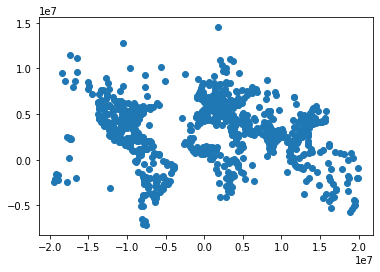

In [6]:
plt.scatter(air["x"], air["y"])

In [7]:
air.to_file('airports_clean.geojson', driver='GeoJSON')

---

[[Download the `airports_clean.geojson` file]](airports_clean.geojson)